In [1]:
import pandas as pd 
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt  #importing the required packages

In [2]:
apprenticeships = pd.read_csv("C:/Users/asus/Documents/Data Projects/apprenticeships-and-traineeships_2022-23/data/Cleaned Data/Total Apprenticeship Time Series.csv")

In [3]:
apprenticeships.head() #view the data

,time_period,time_identifier,geographic_level,country_code,country_name,apps_all,app_intermediate,app_advanced,app_higher
0,2005,Academic year,National,E92000001,England,"403,000",z,z,z
1,2006,Academic year,National,E92000001,England,"388,000",z,z,z
2,2007,Academic year,National,E92000001,England,"418,900",z,z,z
3,2008,Academic year,National,E92000001,England,"444,800",z,z,z
4,2009,Academic year,National,E92000001,England,"491,300",z,z,z


In [4]:
apprenticeships.replace('z', pd.NA, inplace=True) 
print(apprenticeships) #replacing 'Z' with NaN as these represent nulls

    time_period time_identifier geographic_level country_code country_name  \
0          2005   Academic year         National    E92000001      England   
1          2006   Academic year         National    E92000001      England   
2          2007   Academic year         National    E92000001      England   
3          2008   Academic year         National    E92000001      England   
4          2009   Academic year         National    E92000001      England   
5          2010   Academic year         National    E92000001      England   
6          2011   Academic year         National    E92000001      England   
7          2012   Academic year         National    E92000001      England   
8          2013   Academic year         National    E92000001      England   
9          2014   Academic year         National    E92000001      England   
10         2015   Academic year         National    E92000001      England   
11         2016   Academic year         National    E92000001   

In [5]:
apprenticeships.dropna(inplace=True) #dropping Na's

In [6]:
apprenticeships['apps_all'] = apprenticeships['apps_all'].str.replace(',', '').astype(int) #removing commas from the numbers and setting as type INT

In [7]:
apprenticeships['app_intermediate'] = pd.to_numeric(apprenticeships['app_intermediate'].str.replace(',', ''), errors='coerce')
apprenticeships['app_advanced'] = pd.to_numeric(apprenticeships['app_advanced'].str.replace(',', ''), errors='coerce')
apprenticeships['app_higher'] = pd.to_numeric(apprenticeships['app_higher'].str.replace(',', ''), errors='coerce')
#cleaning done


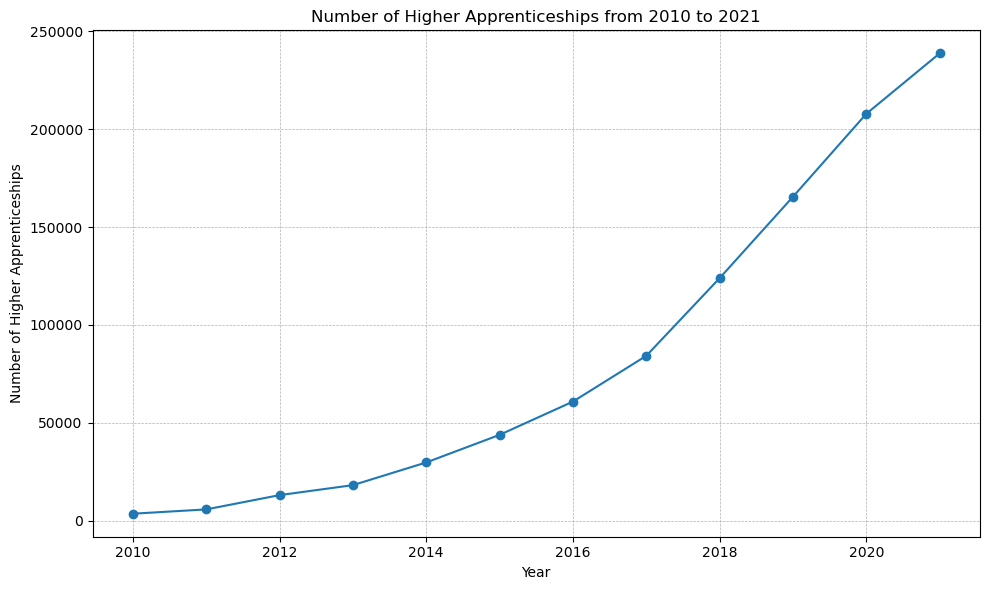

In [8]:
plt.figure(figsize=(10,6))
plt.plot(apprenticeships['time_period'], apprenticeships['app_higher'], marker='o')
plt.title('Number of Higher Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Higher Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show() 

#line chart 

<Figure size 1200x700 with 0 Axes>

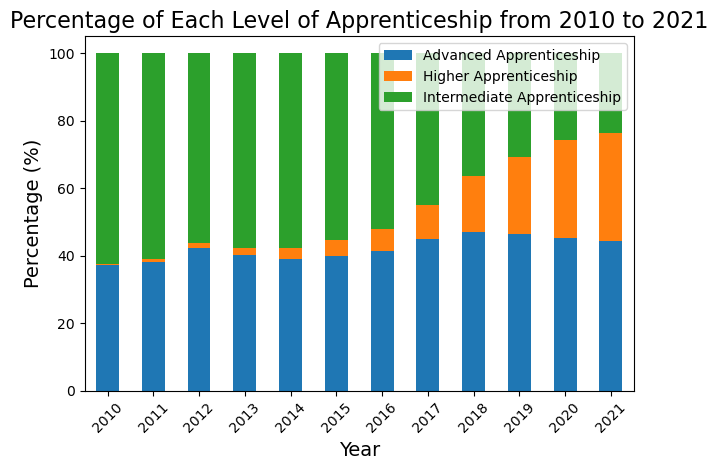

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time_period' to datetime format
apprenticeships['time_period'] = pd.to_datetime(apprenticeships['time_period'], format='%Y')

# Filter data for the relevant years because data on levels only exists from 2010
filtered_data = apprenticeships[(apprenticeships['time_period'].dt.year >= 2010) & (apprenticeships['time_period'].dt.year <= 2021)]

# Pivot the data to get the counts of each level for each year
pivot_data = filtered_data.pivot_table(index=filtered_data['time_period'].dt.year, values=['app_intermediate', 'app_advanced', 'app_higher'], aggfunc='sum', fill_value=0)

# Calculate the total for each year
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the percentage of each level for each year
percentage_data = pivot_data.div(pivot_data['Total'], axis=0) * 100

# Plotting
plt.figure(figsize=(12, 7))
ax = percentage_data.drop(columns='Total').plot(kind='bar', stacked=True)

# Customizing legend labels
ax.legend(['Advanced Apprenticeship', 'Higher Apprenticeship', 'Intermediate Apprenticeship'])

# Adding title and labels
plt.title('Percentage of Each Level of Apprenticeship from 2010 to 2021', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


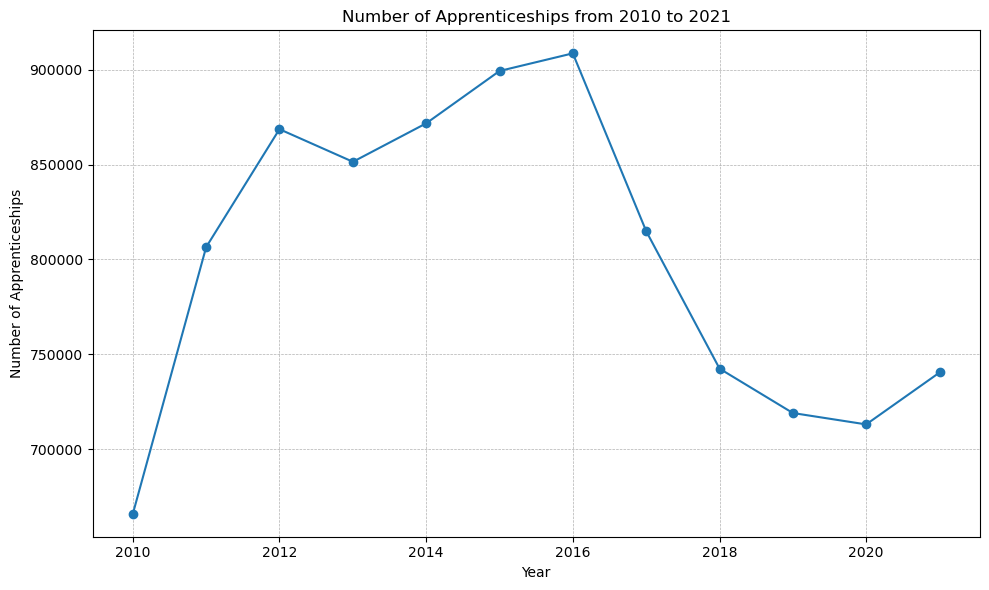

In [10]:
plt.figure(figsize=(10,6))
plt.plot(apprenticeships['time_period'], apprenticeships['apps_all'], marker='o')
plt.title('Number of Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show() 

#line chart  #total apprenticeships all levels

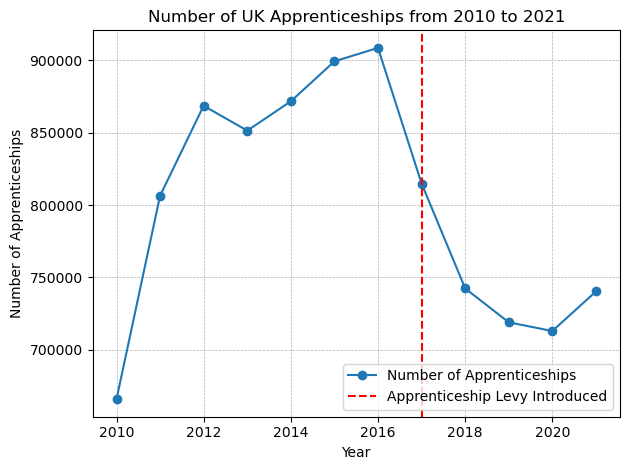

In [11]:
# Ploting the line data
plt.plot(apprenticeships['time_period'], apprenticeships['apps_all'], marker='o', label='Number of Apprenticeships')

# Adding a vertical reference line for the year 2017 (apprenticeship levy introduced) with zorder=2
plt.axvline(x=pd.to_datetime('2017'), color='red', linestyle='--', label='Apprenticeship Levy Introduced', zorder=2)

plt.title('Number of UK Apprenticeships from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Add a legend
plt.legend()

plt.show()

In [12]:
print(apprenticeships.dtypes)

time_period         datetime64[ns]
time_identifier             object
geographic_level            object
country_code                object
country_name                object
apps_all                     int32
app_intermediate             int64
app_advanced                 int64
app_higher                   int64
dtype: object


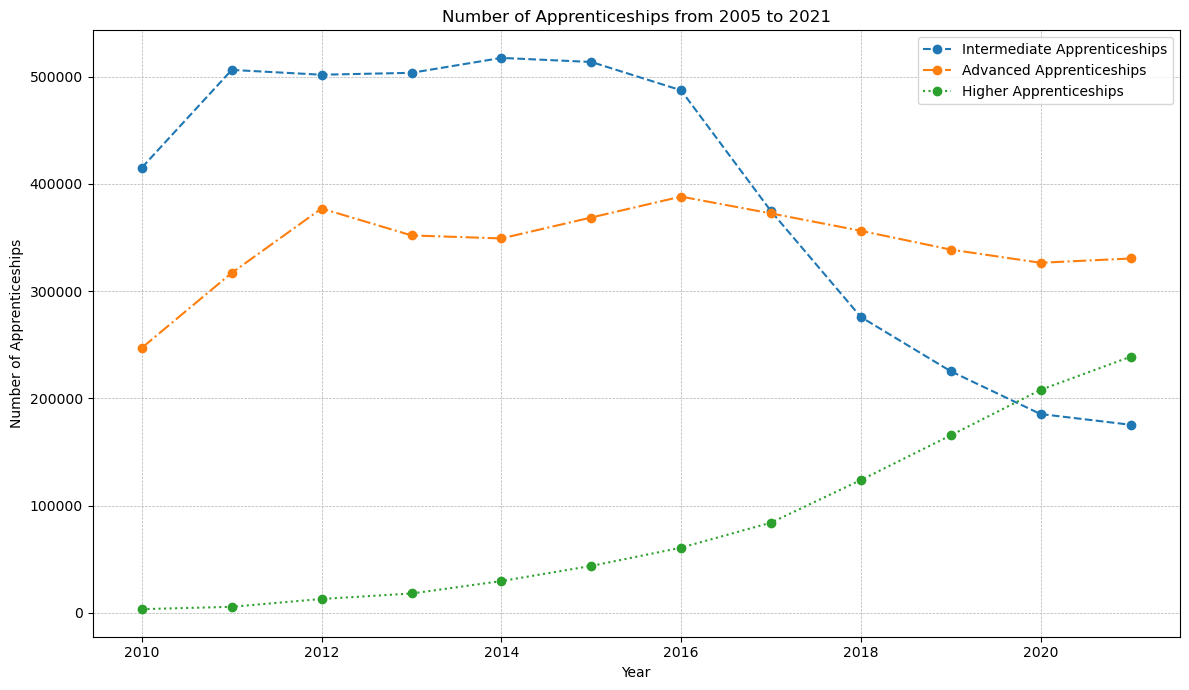

In [13]:
# Convert 'time_period' to datetime type
apprenticeships['time_period'] = pd.to_datetime(apprenticeships['time_period'], format='%Y')

# Filter the data for the desired time period
filtered_apprenticeships = apprenticeships[(apprenticeships['time_period'].dt.year >= 2005) & (apprenticeships['time_period'].dt.year <= 2021)]

# Plot
plt.figure(figsize=(12, 7))

# Plotting each line
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_intermediate'], marker='o', linestyle='--', label='Intermediate Apprenticeships')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_advanced'], marker='o', linestyle='-.', label='Advanced Apprenticeships')
plt.plot(filtered_apprenticeships['time_period'], filtered_apprenticeships['app_higher'], marker='o', linestyle=':', label='Higher Apprenticeships')

# Adding title, labels, and legend
plt.title('Number of Apprenticeships from 2005 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Apprenticeships')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.show()


In [14]:
#new data set 
apprenticeships1 = pd.read_csv("C:\\Users\\asus\\Documents\\Data Projects\\apprenticeships-and-traineeships_2022-23\\data\\Cleaned Data\\Apprenticeship Deprivation Analysis.csv")


In [15]:
apprenticeships1.head()

,time_period,stem,level,detailed_level,age_youth_adult,age_group,learner_home_depriv,leavers,achievers,retention_rate,pass_rate,achievement_rate
0,201920,Total,Total,Total,Total,Total,Total,270470,155440,58.7,97.9,57.5
1,201920,Total,Total,Total,Total,Total,One (most deprived),60930,32160,54.1,97.6,52.8
2,201920,Total,Total,Total,Total,Total,Two,56520,30850,56,97.5,54.6
3,201920,Total,Total,Total,Total,Total,Three,54940,32370,60.1,98,58.9
4,201920,Total,Total,Total,Total,Total,Four,51660,31330,61.7,98.3,60.7


In [16]:
# Replacing commas and converting to numeric
apprenticeships1['achievers'] = pd.to_numeric(apprenticeships1['achievers'].str.replace(',', ''), errors='coerce')

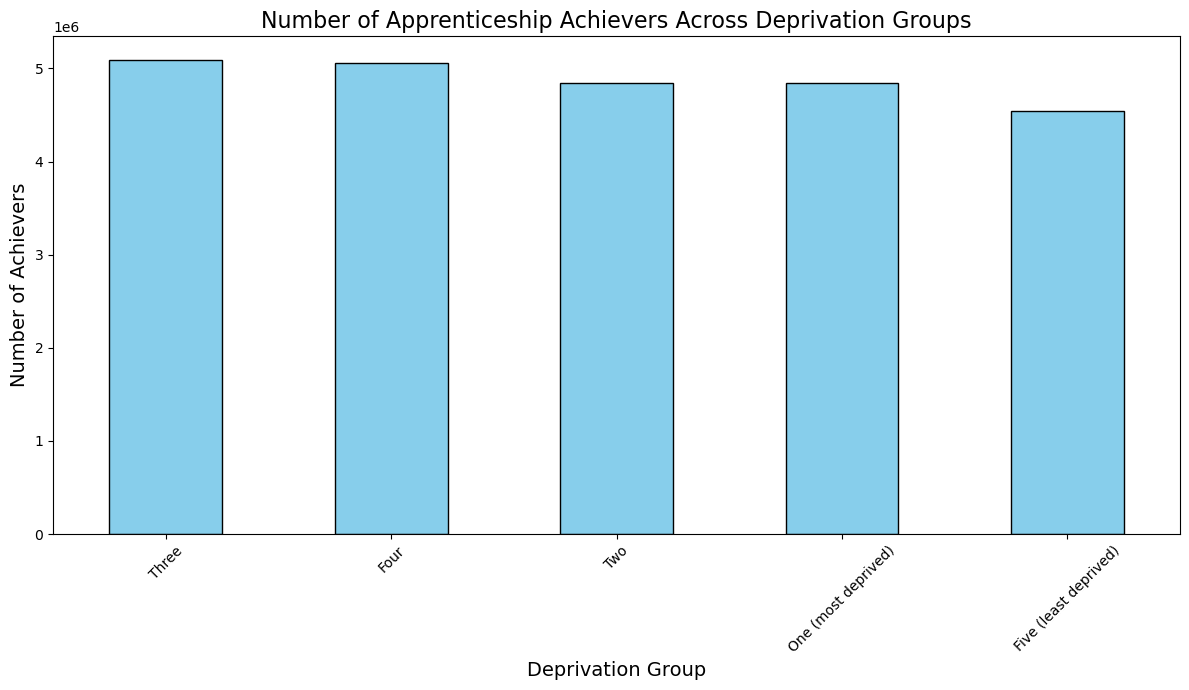

In [17]:
# Filter out 'Total' and 'Unknown' deprivation groups
filtered_data = apprenticeships1[~apprenticeships1['learner_home_depriv'].isin(['Total', 'Unknown'])]

# Grouping data by 'learner_home_depriv' and summing up the 'achievers'
grouped_data = filtered_data.groupby('learner_home_depriv')['achievers'].sum()

# Sort the grouped data in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of Apprenticeship Achievers Across Deprivation Groups', fontsize=16)
plt.xlabel('Deprivation Group', fontsize=14)
plt.ylabel('Number of Achievers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [18]:
print(apprenticeships1['stem'].unique())

['Total' 'STEM - yes' 'STEM - no']


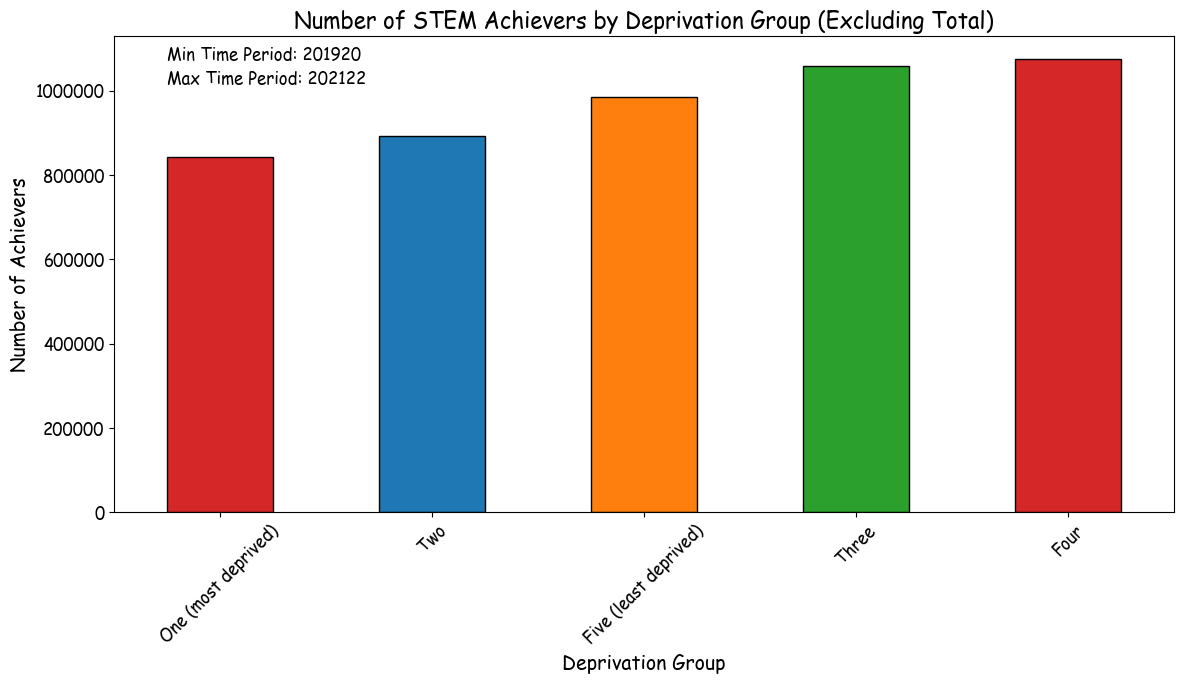

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load the dataset into a DataFrame
data = apprenticeships1  # Replace with the actual file path

# Filtering the data for STEM - yes and exclude 'Total' deprivation levels
filtered_stem_data = data[(data['stem'] == 'STEM - yes') & (data['learner_home_depriv'] != 'Total')& (data['learner_home_depriv'] != 'Unknown')]

# Grouping data by 'learner_home_depriv' and summing up 'achievers'
grouped_data = filtered_stem_data.groupby('learner_home_depriv')['achievers'].sum()

# Sorting the data by the number of achievers
sorted_grouped_data = grouped_data.sort_values()

# Set the desired font (Comic Sans MS)
font_path = "C:\\Windows\\Fonts\\comic.ttf"  #comic sans path
prop = fm.FontProperties(fname=font_path)

# Configure matplotlib to use the specified font
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 12

# Plotting
plt.figure(figsize=(12, 7))
sorted_grouped_data.plot(kind='bar', color=['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], edgecolor='black')
#example of using multiple different colours in a bar chart (it goes in order then repeats)

# Adding title and labels
plt.title('Number of STEM Achievers by Deprivation Group (Excluding Total)', fontsize=16)
plt.xlabel('Deprivation Group', fontsize=14)
plt.ylabel('Number of Achievers', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Display actual values on y-axis

# Display min and max values for time period
min_time_period = data['time_period'].min()
max_time_period = data['time_period'].max()
plt.text(0.05, 0.95, f"Min Time Period: {min_time_period}", transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f"Max Time Period: {max_time_period}", transform=plt.gca().transAxes)

plt.tight_layout()

plt.show()


In [20]:
#new dataset
apprenticeshipsmap = pd.read_csv(r"C:\Users\asus\Documents\Data Projects\apprenticeships-and-traineeships_2022-23\data\app-geography-detailed-202223-q2.csv")


In [21]:
apprenticeshipsmap.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
0,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000009,Trafford,Information and Communication Technology,Total,Black/African/Caribbean/Black British,Intermediate Apprenticeship,low,low
1,202223,Academic year,Local authority district,E92000001,England,E12000007,London,E09000002,Barking and Dagenham,Engineering and Manufacturing Technologies,Total,White,Total,40,10
2,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000113,Swale,Engineering and Manufacturing Technologies,Male,Total,Higher Apprenticeship,low,low
3,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000223,Adur,Information and Communication Technology,Female,Black/African/Caribbean/Black British,Total,low,low
4,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E06000021,Stoke-on-Trent,Education and Training,Male,White,Advanced Apprenticeship,10,low


In [22]:
apprenticeshipsmap.dtypes

time_period          int64
time_identifier     object
geographic_level    object
country_code        object
country_name        object
region_code         object
region_name         object
lad_code            object
lad_name            object
ssa_t1_desc         object
sex                 object
ethnicity_major     object
apps_level          object
starts              object
achievements        object
dtype: object

In [23]:
apprenticeshipsmap['achievements'] = apprenticeshipsmap['achievements'].replace('low', 5) #replacing low with 5
apprenticeshipsmap['starts'] = apprenticeshipsmap['starts'].replace('low', 5) #replacing low with 5

# Convert the column to numeric values
apprenticeshipsmap['achievements'] = pd.to_numeric(apprenticeshipsmap['achievements']) #converting to numeric as they are objects

In [24]:
apprenticeshipsmap.dropna() #drop na

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
0,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000009,Trafford,Information and Communication Technology,Total,Black/African/Caribbean/Black British,Intermediate Apprenticeship,5,5
1,202223,Academic year,Local authority district,E92000001,England,E12000007,London,E09000002,Barking and Dagenham,Engineering and Manufacturing Technologies,Total,White,Total,40,10
2,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000113,Swale,Engineering and Manufacturing Technologies,Male,Total,Higher Apprenticeship,5,5
3,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000223,Adur,Information and Communication Technology,Female,Black/African/Caribbean/Black British,Total,5,5
4,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E06000021,Stoke-on-Trent,Education and Training,Male,White,Advanced Apprenticeship,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374185,202223,Academic year,Local authority district,E92000001,England,E12000007,London,E09000022,Lambeth,Engineering and Manufacturing Technologies,Male,Asian/Asian British,Intermediate Apprenticeship,5,5
374186,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E07000199,Tamworth,"Leisure, Travel and Tourism",Female,Unknown,Higher Apprenticeship,5,5
374187,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000010,Wigan,"Business, Administration and Law",Male,Asian/Asian British,Advanced Apprenticeship,5,5
374188,202223,Academic year,Local authority district,E92000001,England,E12000006,East of England,E07000075,Rochford,"Health, Public Services and Care",Male,Asian/Asian British,Higher Apprenticeship,5,5


In [25]:
# Convert the columns to numeric values
apprenticeshipsmap['achievements'] = pd.to_numeric(apprenticeshipsmap['achievements'])
apprenticeshipsmap['starts'] = pd.to_numeric(apprenticeshipsmap['starts'])


In [26]:
apprenticeshipsmap.dropna(subset=['lad_name'], inplace=True) #dropping NA's in lad_name

In [27]:
apprenticeshipsmap.dropna(subset=['achievements'], inplace=True) #dropping NA's in achievements

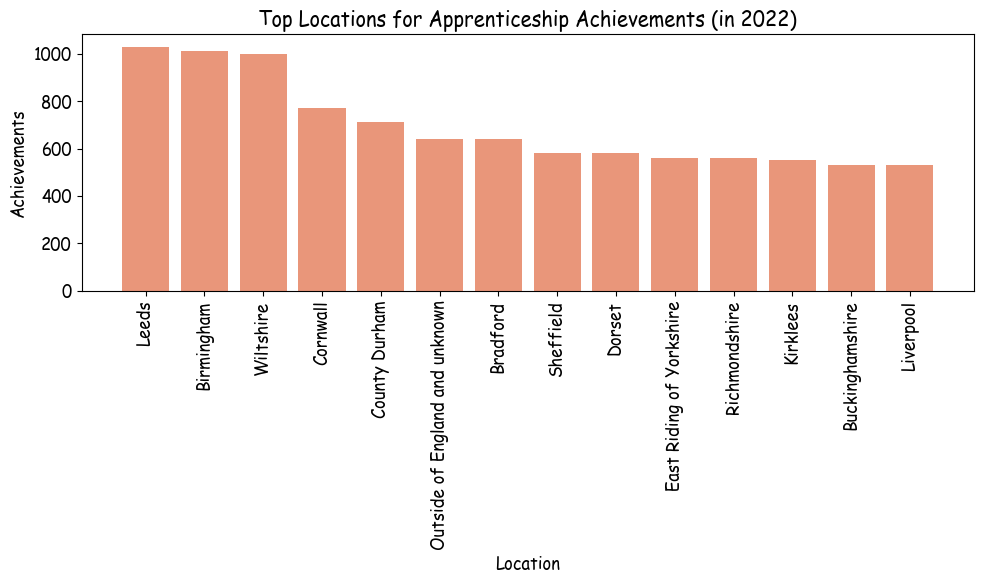

In [28]:
# Select top 10 locations with highest achievements
top_30_locations = apprenticeshipsmap.nlargest(30, 'achievements')

# Create the bar chart using the top_10_locations
plt.figure(figsize=(10, 6))
plt.bar(top_30_locations["lad_name"], top_30_locations["achievements"], color="darksalmon")
plt.xlabel("Location")
plt.ylabel("Achievements")
plt.title("Top Locations for Apprenticeship Achievements (in 2022)")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

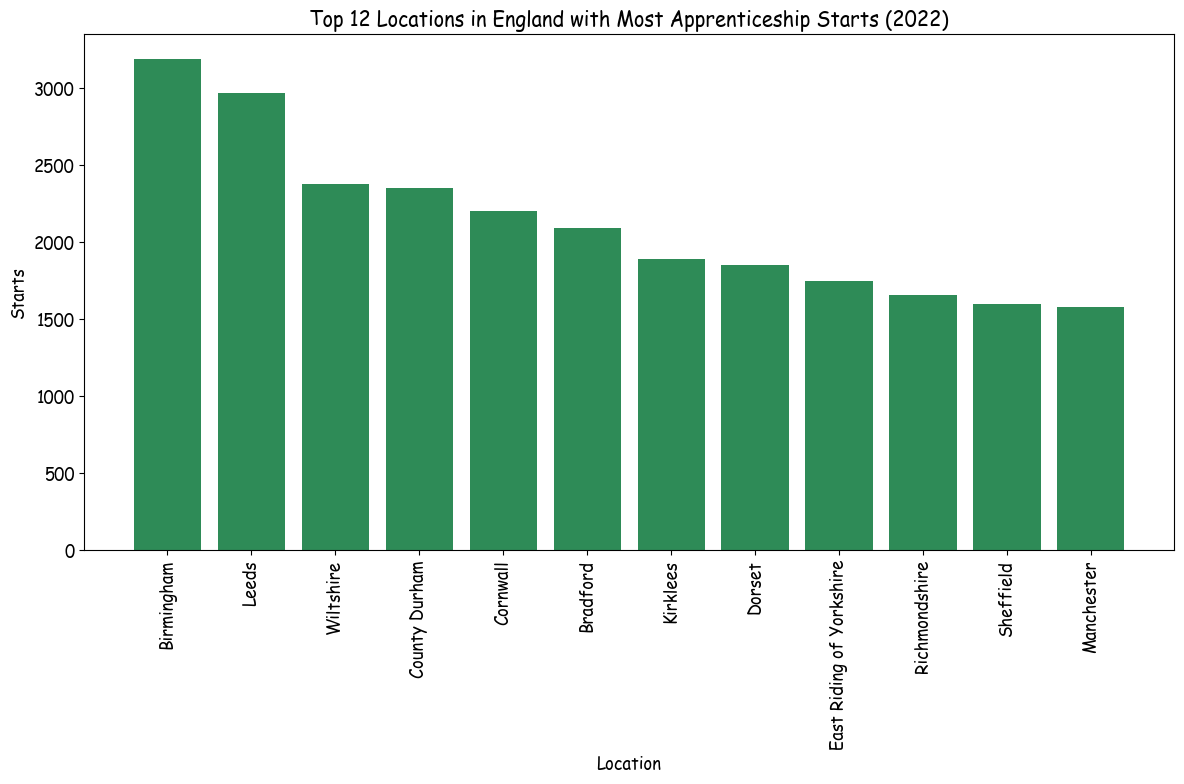

In [29]:
filtered_locations = apprenticeshipsmap[
    (apprenticeshipsmap['country_code'] == 'E92000001') &
    (apprenticeshipsmap['lad_name'] != 'Outside of England and unknown')  # removing unknown
]

# Select top 20 locations with most starts
top_20_locations = filtered_locations.nlargest(20, 'starts')

# Create the bar chart using the top_20_locations DataFrame
plt.figure(figsize=(12, 8))
plt.bar(top_20_locations["lad_name"], top_20_locations["starts"], color="seagreen") #i like this colour
plt.xlabel("Location")
plt.ylabel("Starts")
plt.title("Top 12 Locations in England with Most Apprenticeship Starts (2022)")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

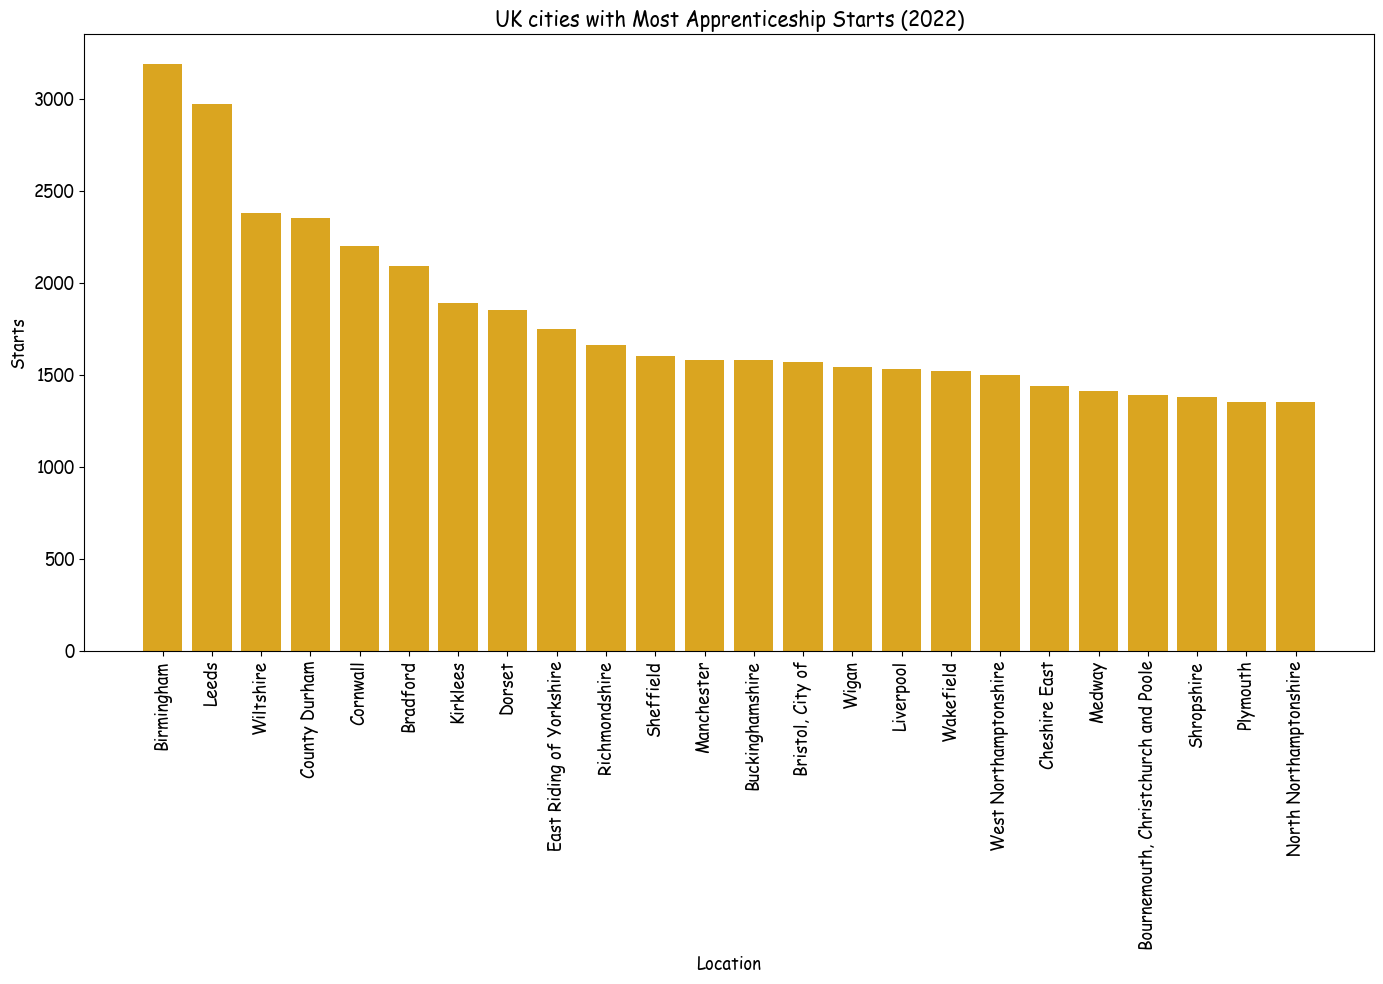

In [30]:
top_50_locations = filtered_locations.nlargest(50, 'starts')

# Create the bar chart using the top_50_locations DataFrame
plt.figure(figsize=(14, 10))
plt.bar(top_50_locations["lad_name"], top_50_locations["starts"], color="goldenrod")
plt.xlabel("Location")
plt.ylabel("Starts")
plt.title("UK cities with Most Apprenticeship Starts (2022)") #including more cities
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [31]:
apprenticeships.head()

,time_period,time_identifier,geographic_level,country_code,country_name,apps_all,app_intermediate,app_advanced,app_higher
5,2010-01-01,Academic year,National,E92000001,England,665900,415200,247200,3500
6,2011-01-01,Academic year,National,E92000001,England,806500,506200,317000,5700
7,2012-01-01,Academic year,National,E92000001,England,868700,501700,377000,13000
8,2013-01-01,Academic year,National,E92000001,England,851500,503500,351900,18100
9,2014-01-01,Academic year,National,E92000001,England,871800,517400,349100,29700


In [32]:
apprenticeships1['leavers'] = pd.to_numeric(apprenticeships1['leavers'], errors='coerce')
apprenticeships1.head()

,time_period,stem,level,detailed_level,age_youth_adult,age_group,learner_home_depriv,leavers,achievers,retention_rate,pass_rate,achievement_rate
0,201920,Total,Total,Total,Total,Total,Total,270470.0,155440.0,58.7,97.9,57.5
1,201920,Total,Total,Total,Total,Total,One (most deprived),60930.0,32160.0,54.1,97.6,52.8
2,201920,Total,Total,Total,Total,Total,Two,56520.0,30850.0,56,97.5,54.6
3,201920,Total,Total,Total,Total,Total,Three,54940.0,32370.0,60.1,98,58.9
4,201920,Total,Total,Total,Total,Total,Four,51660.0,31330.0,61.7,98.3,60.7


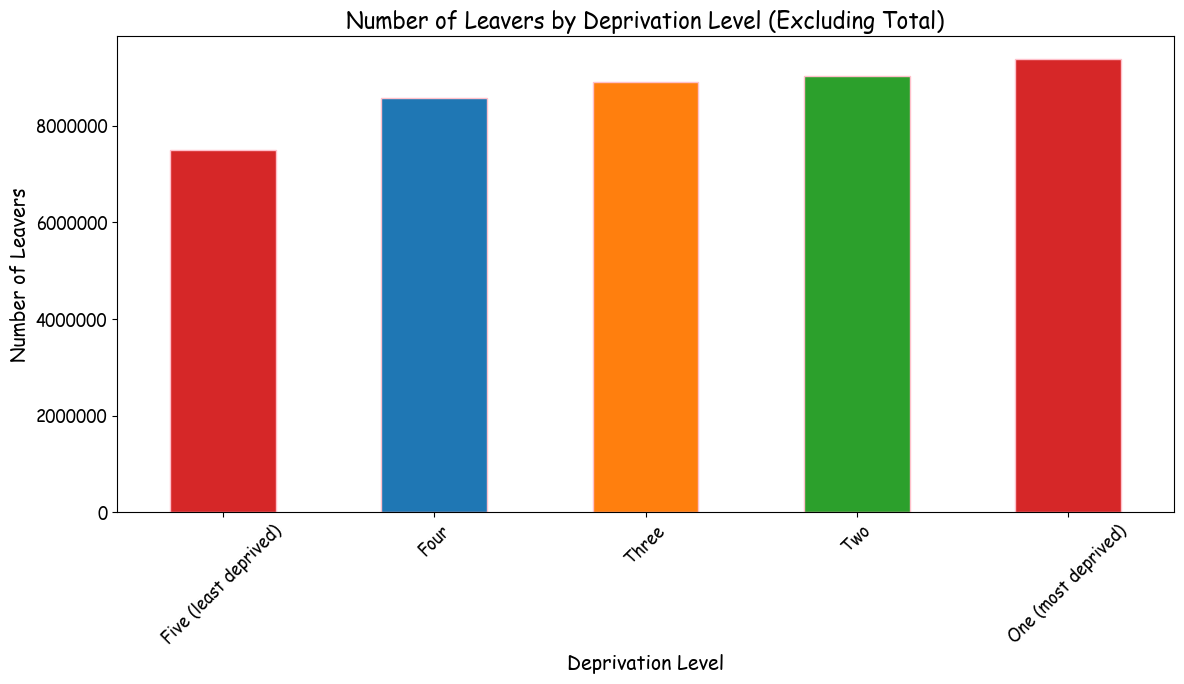

In [33]:
data=apprenticeships1
# Assuming you have already loaded your data into a DataFrame named 'data'

# Filter out rows with 'Total' and 'Unknown' deprivation levels
filtered_data = data[~data['learner_home_depriv'].isin(['Total', 'Unknown'])]

# Group data by 'learner_home_depriv' and sum up the 'leavers'
grouped_data = filtered_data.groupby('learner_home_depriv')['leavers'].sum()

# Sort the data by the number of leavers
sorted_grouped_data = grouped_data.sort_values()

# Plotting
plt.figure(figsize=(12, 7))
sorted_grouped_data.plot(kind='bar', color=['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], edgecolor='pink') #pink edgecolour

# Adding title and labels
plt.title('Number of Leavers by Deprivation Level (Excluding Total)', fontsize=16)
plt.xlabel('Deprivation Level', fontsize=14)
plt.ylabel('Number of Leavers', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Display actual values on y-axis
plt.tight_layout()

plt.show()


In [34]:
apprenticeshipsmap.head(5)

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_t1_desc,sex,ethnicity_major,apps_level,starts,achievements
0,202223,Academic year,Local authority district,E92000001,England,E12000002,North West,E08000009,Trafford,Information and Communication Technology,Total,Black/African/Caribbean/Black British,Intermediate Apprenticeship,5,5
1,202223,Academic year,Local authority district,E92000001,England,E12000007,London,E09000002,Barking and Dagenham,Engineering and Manufacturing Technologies,Total,White,Total,40,10
2,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000113,Swale,Engineering and Manufacturing Technologies,Male,Total,Higher Apprenticeship,5,5
3,202223,Academic year,Local authority district,E92000001,England,E12000008,South East,E07000223,Adur,Information and Communication Technology,Female,Black/African/Caribbean/Black British,Total,5,5
4,202223,Academic year,Local authority district,E92000001,England,E12000005,West Midlands,E06000021,Stoke-on-Trent,Education and Training,Male,White,Advanced Apprenticeship,10,5


<Figure size 1200x700 with 0 Axes>

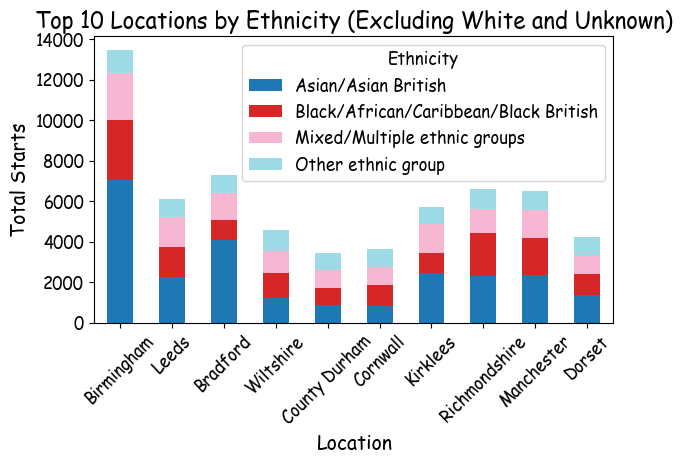

In [35]:
# Filter the data to exclude 'White' and 'Unknown' ethnicities
excluded_ethnicities = ['White', 'Unknown']
excluded_locations = ['Outside of England and unknown']
filtered_data = apprenticeshipsmap[~apprenticeshipsmap['ethnicity_major'].isin(excluded_ethnicities)]
filtered_data = filtered_data[~filtered_data['lad_name'].isin(excluded_locations)]

# Group data by 'lad_name' (location) and 'ethnicity_major', and sum up the 'starts'
grouped_data = filtered_data.groupby(['lad_name', 'ethnicity_major'])['starts'].sum().reset_index()

# Pivot the data to create a suitable table for plotting
pivot_table = grouped_data.pivot(index='lad_name', columns='ethnicity_major', values='starts')

# Calculate the total starts for each location
pivot_table['Total'] = pivot_table.sum(axis=1)

# Get the top 10 locations based on total starts
top_locations = pivot_table.nlargest(10, 'Total')

# Plot
plt.figure(figsize=(12, 7))
top_locations.drop('Total', axis=1).plot(kind='bar', stacked=True, colormap='tab20')

# Adding title and labels
plt.title('Top 10 Locations by Ethnicity (Excluding White and Unknown)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Starts', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Ethnicity')

plt.tight_layout()
plt.show()


In [37]:
apprenticeshipsmap.head

<bound method NDFrame.head of         time_period time_identifier          geographic_level country_code  \
0            202223   Academic year  Local authority district    E92000001   
1            202223   Academic year  Local authority district    E92000001   
2            202223   Academic year  Local authority district    E92000001   
3            202223   Academic year  Local authority district    E92000001   
4            202223   Academic year  Local authority district    E92000001   
...             ...             ...                       ...          ...   
374185       202223   Academic year  Local authority district    E92000001   
374186       202223   Academic year  Local authority district    E92000001   
374187       202223   Academic year  Local authority district    E92000001   
374188       202223   Academic year  Local authority district    E92000001   
374189       202223   Academic year  Local authority district    E92000001   

       country_name region_code  

In [40]:
provider=pd.read_csv("C:/Users/asus/Documents/Data Projects/data/app-provider-starts-202223-q3.csv")

In [41]:
provider.head

<bound method NDFrame.head of         time_period time_identifier geographic_level country_name  \
0            201718   Academic year         Provider      England   
1            201718   Academic year         Provider      England   
2            201718   Academic year         Provider      England   
3            201718   Academic year         Provider      England   
4            201718   Academic year         Provider      England   
...             ...             ...              ...          ...   
105635       202223   Academic year         Provider      England   
105636       202223   Academic year         Provider      England   
105637       202223   Academic year         Provider      England   
105638       202223   Academic year         Provider      England   
105639       202223   Academic year         Provider      England   

       country_code                         provider_name  provider_ukprn  \
0         E92000001  1ST CARE TRAINING LIMITED (10046498)       

In [42]:
provider.dtypes

time_period          int64
time_identifier     object
geographic_level    object
country_name        object
country_code        object
provider_name       object
provider_ukprn       int64
apps_level          object
ssa_t1_desc         object
starts              object
achievements        object
dtype: object

In [44]:
provider['starts'] = pd.to_numeric(provider['starts'].str.replace('low', '5'), errors='coerce')
provider['achievements'] = pd.to_numeric(provider['achievements'].str.replace('low', '5'), errors='coerce')
#cleaning done


In [45]:
provider.head

<bound method NDFrame.head of         time_period time_identifier geographic_level country_name  \
0            201718   Academic year         Provider      England   
1            201718   Academic year         Provider      England   
2            201718   Academic year         Provider      England   
3            201718   Academic year         Provider      England   
4            201718   Academic year         Provider      England   
...             ...             ...              ...          ...   
105635       202223   Academic year         Provider      England   
105636       202223   Academic year         Provider      England   
105637       202223   Academic year         Provider      England   
105638       202223   Academic year         Provider      England   
105639       202223   Academic year         Provider      England   

       country_code                         provider_name  provider_ukprn  \
0         E92000001  1ST CARE TRAINING LIMITED (10046498)       

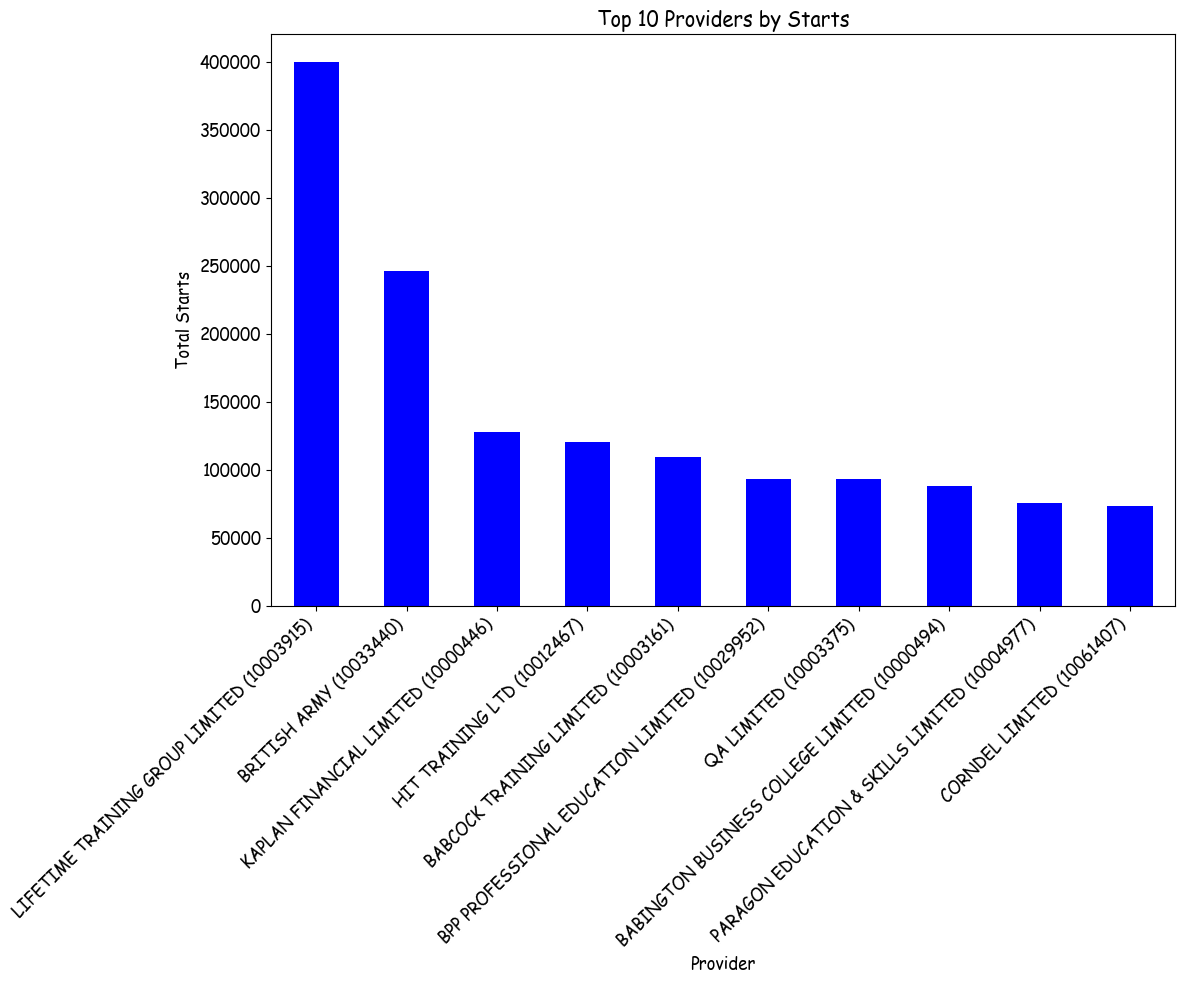

In [52]:
provider_starts = provider.groupby('provider_name')['starts'].sum() #group by provider name and sum by starts

# Get the top 10 providers based on starts
top_providers = provider_starts.nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 10))
top_providers.plot(kind='bar', color='blue')
plt.title('Top 10 Providers by Starts')
plt.xlabel('Provider')
plt.ylabel('Total Starts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

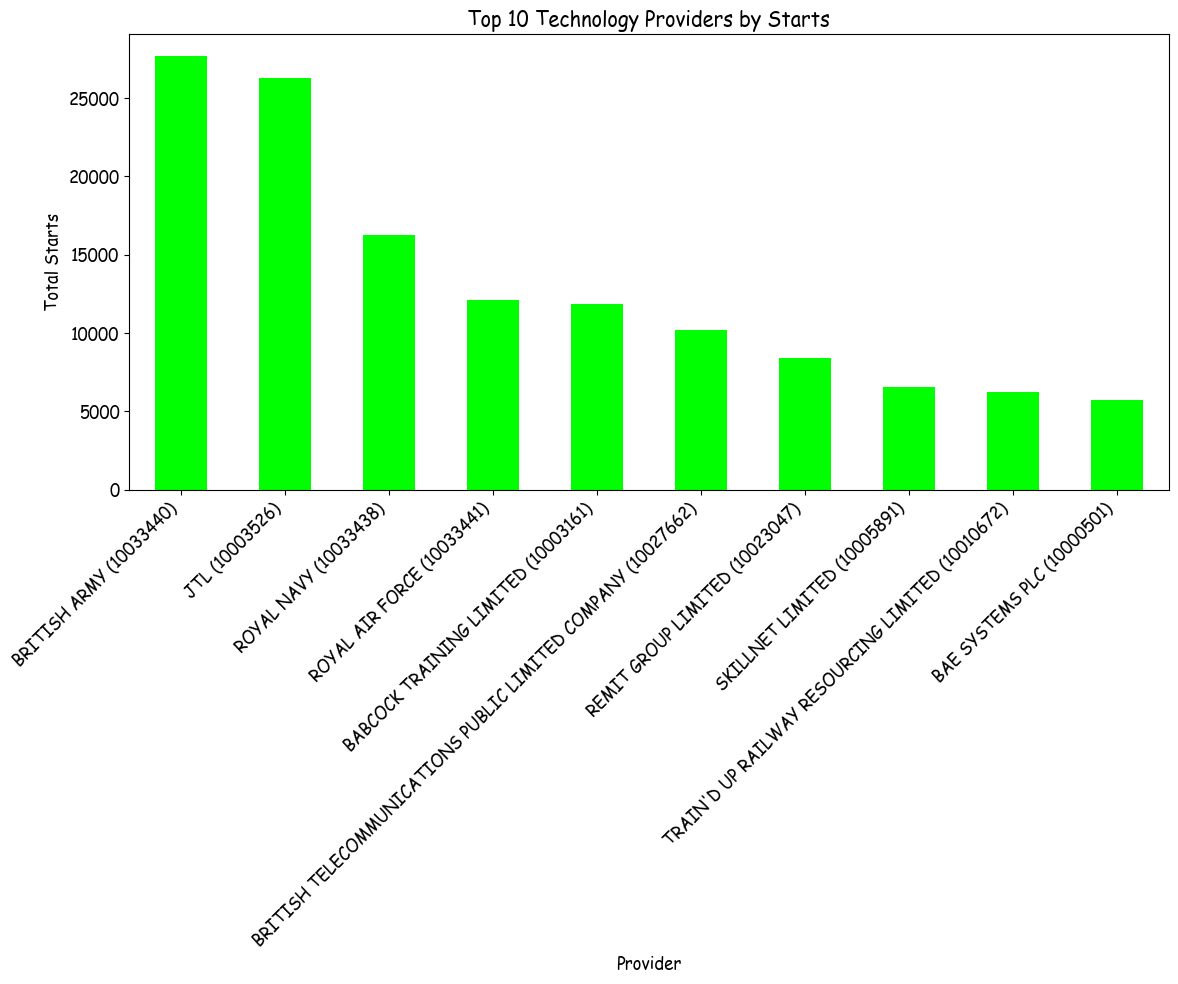

In [54]:
# Filter the DataFrame to include only apprenticeships in technology
technology_providers = provider[provider['ssa_t1_desc'] == 'Engineering and Manufacturing Technologies']

# Group data by provider_name and calculate the sum of starts
provider_starts = technology_providers.groupby('provider_name')['starts'].sum()

# Get the top 10 technology providers based on starts
top_technology_providers = provider_starts.nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 10))
top_technology_providers.plot(kind='bar', color='lime')
plt.title('Top 10 Technology Providers by Starts')
plt.xlabel('Provider')
plt.ylabel('Total Starts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


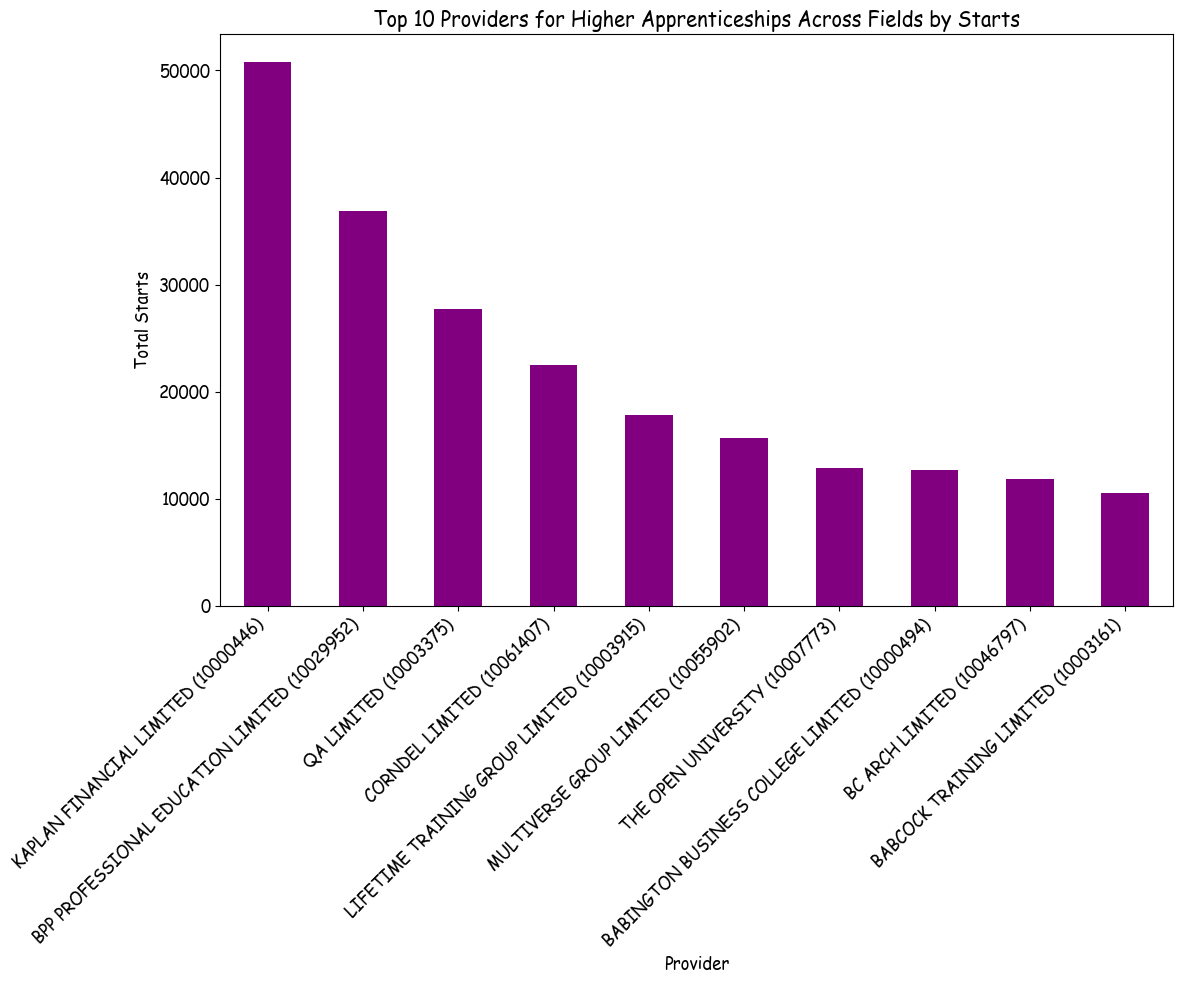

In [57]:
# Filter the DataFrame to include only higher apprenticeships
higher_apprenticeship_providers = provider[provider['apps_level'] == 'Higher Apprenticeship']

# Group data by provider_name and calculate the sum of starts
provider_starts = higher_apprenticeship_providers.groupby('provider_name')['starts'].sum()

# Get the top 10 providers for higher apprenticeships based on starts
top_higher_apprenticeship_providers = provider_starts.nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 10))
top_higher_apprenticeship_providers.plot(kind='bar', color='purple')
plt.title('Top 10 Providers for Higher Apprenticeships Across Fields by Starts')
plt.xlabel('Provider')
plt.ylabel('Total Starts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [58]:
provider.head()

,time_period,time_identifier,geographic_level,country_name,country_code,provider_name,provider_ukprn,apps_level,ssa_t1_desc,starts,achievements
0,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Advanced Apprenticeship,"Health, Public Services and Care",10,5
1,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Advanced Apprenticeship,Total,10,5
2,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Higher Apprenticeship,"Health, Public Services and Care",5,5
3,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Higher Apprenticeship,Total,5,5
4,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Intermediate Apprenticeship,"Health, Public Services and Care",10,5


In [59]:
# Find the minimum and maximum time periods
min_time_period = provider['time_period'].min()
max_time_period = provider['time_period'].max()

print("Minimum Time Period:", min_time_period)
print("Maximum Time Period:", max_time_period)

Minimum Time Period: 201718
Maximum Time Period: 202223


In [64]:
provider.dtypes

time_period          int64
time_identifier     object
geographic_level    object
country_name        object
country_code        object
provider_name       object
provider_ukprn       int64
apps_level          object
ssa_t1_desc         object
starts               int64
achievements         int64
dtype: object

In [65]:
provider.head(10)

,time_period,time_identifier,geographic_level,country_name,country_code,provider_name,provider_ukprn,apps_level,ssa_t1_desc,starts,achievements
0,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Advanced Apprenticeship,"Health, Public Services and Care",10,5
1,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Advanced Apprenticeship,Total,10,5
2,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Higher Apprenticeship,"Health, Public Services and Care",5,5
3,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Higher Apprenticeship,Total,5,5
4,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Intermediate Apprenticeship,"Health, Public Services and Care",10,5
5,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Intermediate Apprenticeship,Total,10,5
6,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Total,"Health, Public Services and Care",20,5
7,201718,Academic year,Provider,England,E92000001,1ST CARE TRAINING LIMITED (10046498),10046498,Total,Total,20,5
8,201718,Academic year,Provider,England,E92000001,2 SISTERS FOOD GROUP LIMITED (10055771),10055771,Advanced Apprenticeship,Retail and Commercial Enterprise,100,5
9,201718,Academic year,Provider,England,E92000001,2 SISTERS FOOD GROUP LIMITED (10055771),10055771,Advanced Apprenticeship,Total,100,5


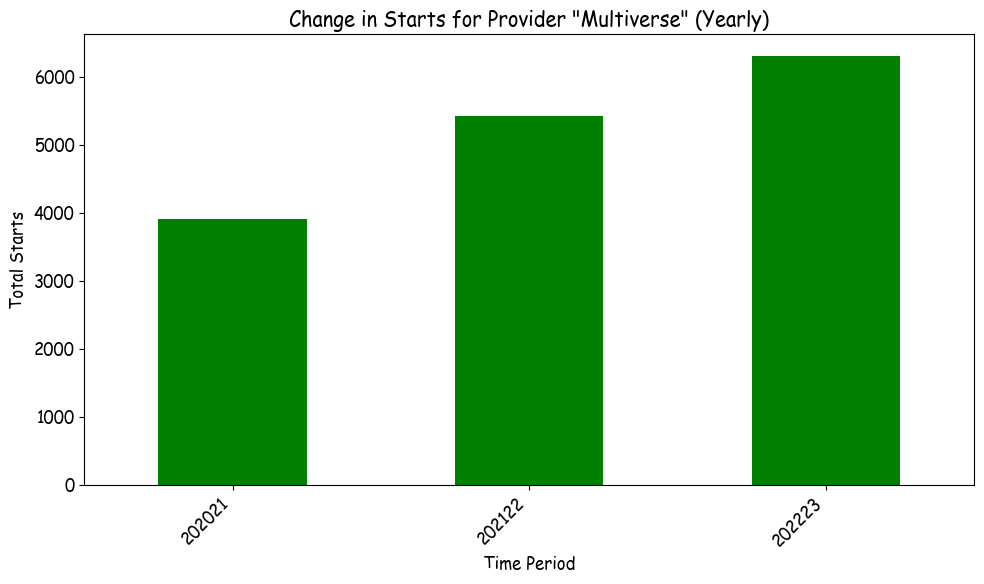

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "provider"

# Filter the DataFrame to include only higher apprenticeships
higher_apprenticeship_providers = provider[provider['apps_level'] == 'Higher Apprenticeship']

# Filter the data for the 'multiverse' provider
multiverse_data = higher_apprenticeship_providers[higher_apprenticeship_providers['provider_name'] == 'MULTIVERSE GROUP LIMITED (10055902)']

# Group the data by time_period and calculate the sum of starts
multiverse_starts_by_year = multiverse_data.groupby('time_period')['starts'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
multiverse_starts_by_year.plot(kind='bar', color='green')

plt.title('Change in Starts for Provider "Multiverse" (Yearly)')
plt.xlabel('Time Period')
plt.ylabel('Total Starts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar chart
plt.show()
